# Examples for EPTools
@copyright by Runduo Liang (Aujust)

## Crossmatch

In [10]:
import EPTools
from astropy.cosmology import Planck18
from astropy.coordinates import SkyCoord
from EPTools.utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = 2e-12

dL = Planck18.luminosity_distance(0.09).value * 1e6

print('lum: {} erg/s'.format(EPTools.utils.flx2lum(f,dL)))

lum: 4.330333114875513e+43 erg/s


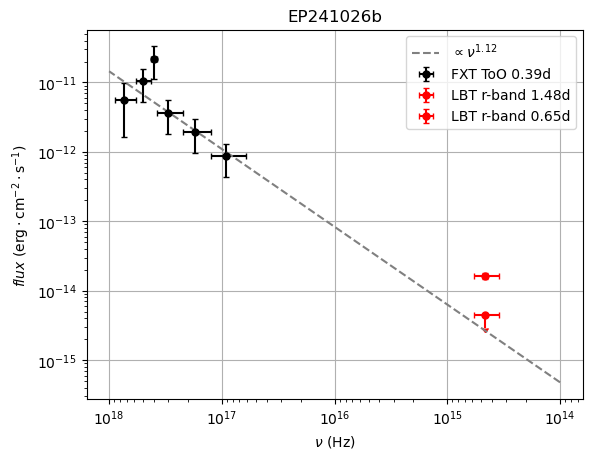

In [73]:
'calculate band flux'
'Lets plot SED of EP241026b'
'WXT observations at 2024-10-26 18:11:15'
'FXT 1st ToO started at 2024-10-27 03:36:23'
'LBT observations 1.48d post trigger, r=21.6'
from astropy.time import Time
dt_FXT = Time('2024-10-27T03:36:23',format='isot', scale='utc').mjd - Time('2024-10-26T18:11:15',format='isot', scale='utc').mjd
#Load FXT ToO data
fxt_sed = np.loadtxt('/Users/liangrunduo/EP/EP-TA-data/EP241026b/ep06800000178_FXTA_0301_s1/FXT_SED_1.txt',skiprows=3)
energy, energy_err, flux_kev,flux_kev_err = fxt_sed[:,0], fxt_sed[:,1], fxt_sed[:,2], fxt_sed[:,3]
x_nus = keV2Hz(energy)
x_nus_err = keV2Hz(energy+energy_err) - x_nus
x_flux = flux_kev * keV2erg(energy)
x_flux_err = flux_kev_err * keV2erg(energy)

LBT_wave, fwhm = EPTools.utils.band_wavelength['R']
LBT_nu = lam2Hz(LBT_wave)
LBT_nu_err = lam2Hz(LBT_wave-fwhm) - LBT_nu
LBT_flux = mag2flx(21.6,LBT_wave,fwhm)
mag_err = 0.2
LBT_flux_err = mag2flx(21.5,LBT_wave,fwhm) - mag2flx(21.6,LBT_wave,fwhm)

LBT_uplim = mag2flx(23,LBT_wave,fwhm)

fig, ax = plt.subplots(dpi=100)
ax.errorbar(x=x_nus,y=x_flux,xerr=x_nus_err,yerr=x_flux_err,capsize=2,fmt='o',markersize=5,color='k',label='FXT ToO {:.2f}d'.format(dt_FXT))
ax.errorbar(x=LBT_nu,y=LBT_flux,xerr=LBT_nu_err,yerr=LBT_flux_err,capsize=2,fmt='o',markersize=5,color='r',label='LBT r-band 1.48d')
ax.errorbar(x=LBT_nu,y=LBT_uplim,xerr=LBT_nu_err,yerr=LBT_flux_err,capsize=2,fmt='o',markersize=5,color='r',uplims=True,label='LBT r-band {:.2f}d'.format(15.6/24))


mo_nus = np.logspace(14,18,100)
y = 1e-31*mo_nus**(1.12)
ax.plot(mo_nus,y,ls='--',color='gray',label=r'$\propto \nu^{1.12}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.grid()
ax.set_xlabel(r'$\nu$ (Hz)')
ax.set_ylabel(r'$flux\ (\mathrm{erg}\cdot \mathrm{cm}^{-2} \cdot \mathrm{s}^{-1})$')
ax.legend()
ax.set_title('EP241026b')
plt.savefig('/Users/liangrunduo/EP/EP-TA-data/EP241026b/prelimiary_FXT_LBT.pdf',dpi=300)

In [30]:
mo_nus = np.logspace(14,18,100)
y = mo_nus**(-1)
y

array([1.00000000e-14, 9.11162756e-15, 8.30217568e-15, 7.56463328e-15,
       6.89261210e-15, 6.28029144e-15, 5.72236766e-15, 5.21400829e-15,
       4.75081016e-15, 4.32876128e-15, 3.94420606e-15, 3.59381366e-15,
       3.27454916e-15, 2.98364724e-15, 2.71858824e-15, 2.47707636e-15,
       2.25701972e-15, 2.05651231e-15, 1.87381742e-15, 1.70735265e-15,
       1.55567614e-15, 1.41747416e-15, 1.29154967e-15, 1.17681195e-15,
       1.07226722e-15, 9.77009957e-16, 8.90215085e-16, 8.11130831e-16,
       7.39072203e-16, 6.73415066e-16, 6.13590727e-16, 5.59081018e-16,
       5.09413801e-16, 4.64158883e-16, 4.22924287e-16, 3.85352859e-16,
       3.51119173e-16, 3.19926714e-16, 2.91505306e-16, 2.65608778e-16,
       2.42012826e-16, 2.20513074e-16, 2.00923300e-16, 1.83073828e-16,
       1.66810054e-16, 1.51991108e-16, 1.38488637e-16, 1.26185688e-16,
       1.14975700e-16, 1.04761575e-16, 9.54548457e-17, 8.69749003e-17,
       7.92482898e-17, 7.22080902e-17, 6.57933225e-17, 5.99484250e-17,
      

In [12]:
crossmatch = EPTools.Crossmatch()

pos = '11h44m03.1835850144s +05d47m44.014153920s'

data = crossmatch.xmm_archive(pos)
print(data)

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.17 (26 JAN 2024)
Please upgrade your client if not up to date.

<No columns>
